In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/omicron-covid19-variant-daily-cases/covid-variants.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# ****Data Preprocessing

In [3]:
df=pd.read_csv("../input/omicron-covid19-variant-daily-cases/covid-variants.csv")
df.shape
print(df)


        location        date         variant  num_sequences  perc_sequences  \
0         Angola  2020-07-06           Alpha              0             0.0   
1         Angola  2020-07-06       B.1.1.277              0             0.0   
2         Angola  2020-07-06       B.1.1.302              0             0.0   
3         Angola  2020-07-06       B.1.1.519              0             0.0   
4         Angola  2020-07-06         B.1.160              0             0.0   
...          ...         ...             ...            ...             ...   
100411  Zimbabwe  2021-11-01         Omicron              0             0.0   
100412  Zimbabwe  2021-11-01   S:677H.Robin1              0             0.0   
100413  Zimbabwe  2021-11-01  S:677P.Pelican              0             0.0   
100414  Zimbabwe  2021-11-01          others              0             0.0   
100415  Zimbabwe  2021-11-01         non_who              0             0.0   

        num_sequences_total  
0                    

In [4]:
df.head()
df.describe()


,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [5]:
total_city=df['location'].unique()
print(total_city)
print('total number of cities=',len(total_city))

['Angola' 'Argentina' 'Aruba' 'Australia' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Belize' 'Benin' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Malta'
 'Mauritius' 'Mexico' 'Moldova' 'Monaco' 'Mongolia' 'Montenegro' 'Morocco'
 'Mozambique' 'Nepal' 'Netherlands' 'New Zealand' 'Nigeria'
 'North Macedonia' 'Norway' 'Oman' 'Pakistan' 'Papua New Guinea'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'Russia' 'Rwan

In [6]:
variants=df['variant'].unique()
print(variants)
print('Total number of variants=',len(variants))
dates= df['date'].unique()
print(dates)

['Alpha' 'B.1.1.277' 'B.1.1.302' 'B.1.1.519' 'B.1.160' 'B.1.177' 'B.1.221'
 'B.1.258' 'B.1.367' 'B.1.620' 'Beta' 'Delta' 'Epsilon' 'Eta' 'Gamma'
 'Iota' 'Kappa' 'Lambda' 'Mu' 'Omicron' 'S:677H.Robin1' 'S:677P.Pelican'
 'others' 'non_who']
Total number of variants= 24
['2020-07-06' '2020-08-31' '2020-09-28' '2020-10-12' '2020-10-26'
 '2020-12-07' '2020-12-21' '2021-01-04' '2021-01-11' '2021-01-25'
 '2021-02-08' '2021-02-22' '2021-03-08' '2021-03-22' '2021-04-05'
 '2021-04-19' '2021-05-03' '2021-05-17' '2021-05-31' '2021-06-14'
 '2021-06-28' '2021-07-12' '2021-07-26' '2021-08-09' '2021-08-23'
 '2021-09-06' '2021-09-20' '2021-10-04' '2020-05-11' '2020-05-25'
 '2020-06-08' '2020-06-22' '2020-07-20' '2020-08-03' '2020-08-17'
 '2020-09-14' '2020-11-09' '2020-11-23' '2021-10-18' '2021-11-01'
 '2021-11-15' '2021-11-29' '2021-12-13' '2021-12-27' '2022-01-05']


# Analysing for Omicron variant****

In [7]:

gf= df.groupby('variant')
omicron=gf.get_group('Omicron')
print(omicron)
    
    
    

        location        date  variant  num_sequences  perc_sequences  \
19        Angola  2020-07-06  Omicron              0             0.0   
43        Angola  2020-08-31  Omicron              0             0.0   
67        Angola  2020-09-28  Omicron              0             0.0   
91        Angola  2020-10-12  Omicron              0             0.0   
115       Angola  2020-10-26  Omicron              0             0.0   
...          ...         ...      ...            ...             ...   
100315  Zimbabwe  2021-09-06  Omicron              0             0.0   
100339  Zimbabwe  2021-09-20  Omicron              0             0.0   
100363  Zimbabwe  2021-10-04  Omicron              0             0.0   
100387  Zimbabwe  2021-10-18  Omicron              0             0.0   
100411  Zimbabwe  2021-11-01  Omicron              0             0.0   

        num_sequences_total  
19                        3  
43                        1  
67                       10  
91             

<function matplotlib.pyplot.show(close=None, block=None)>

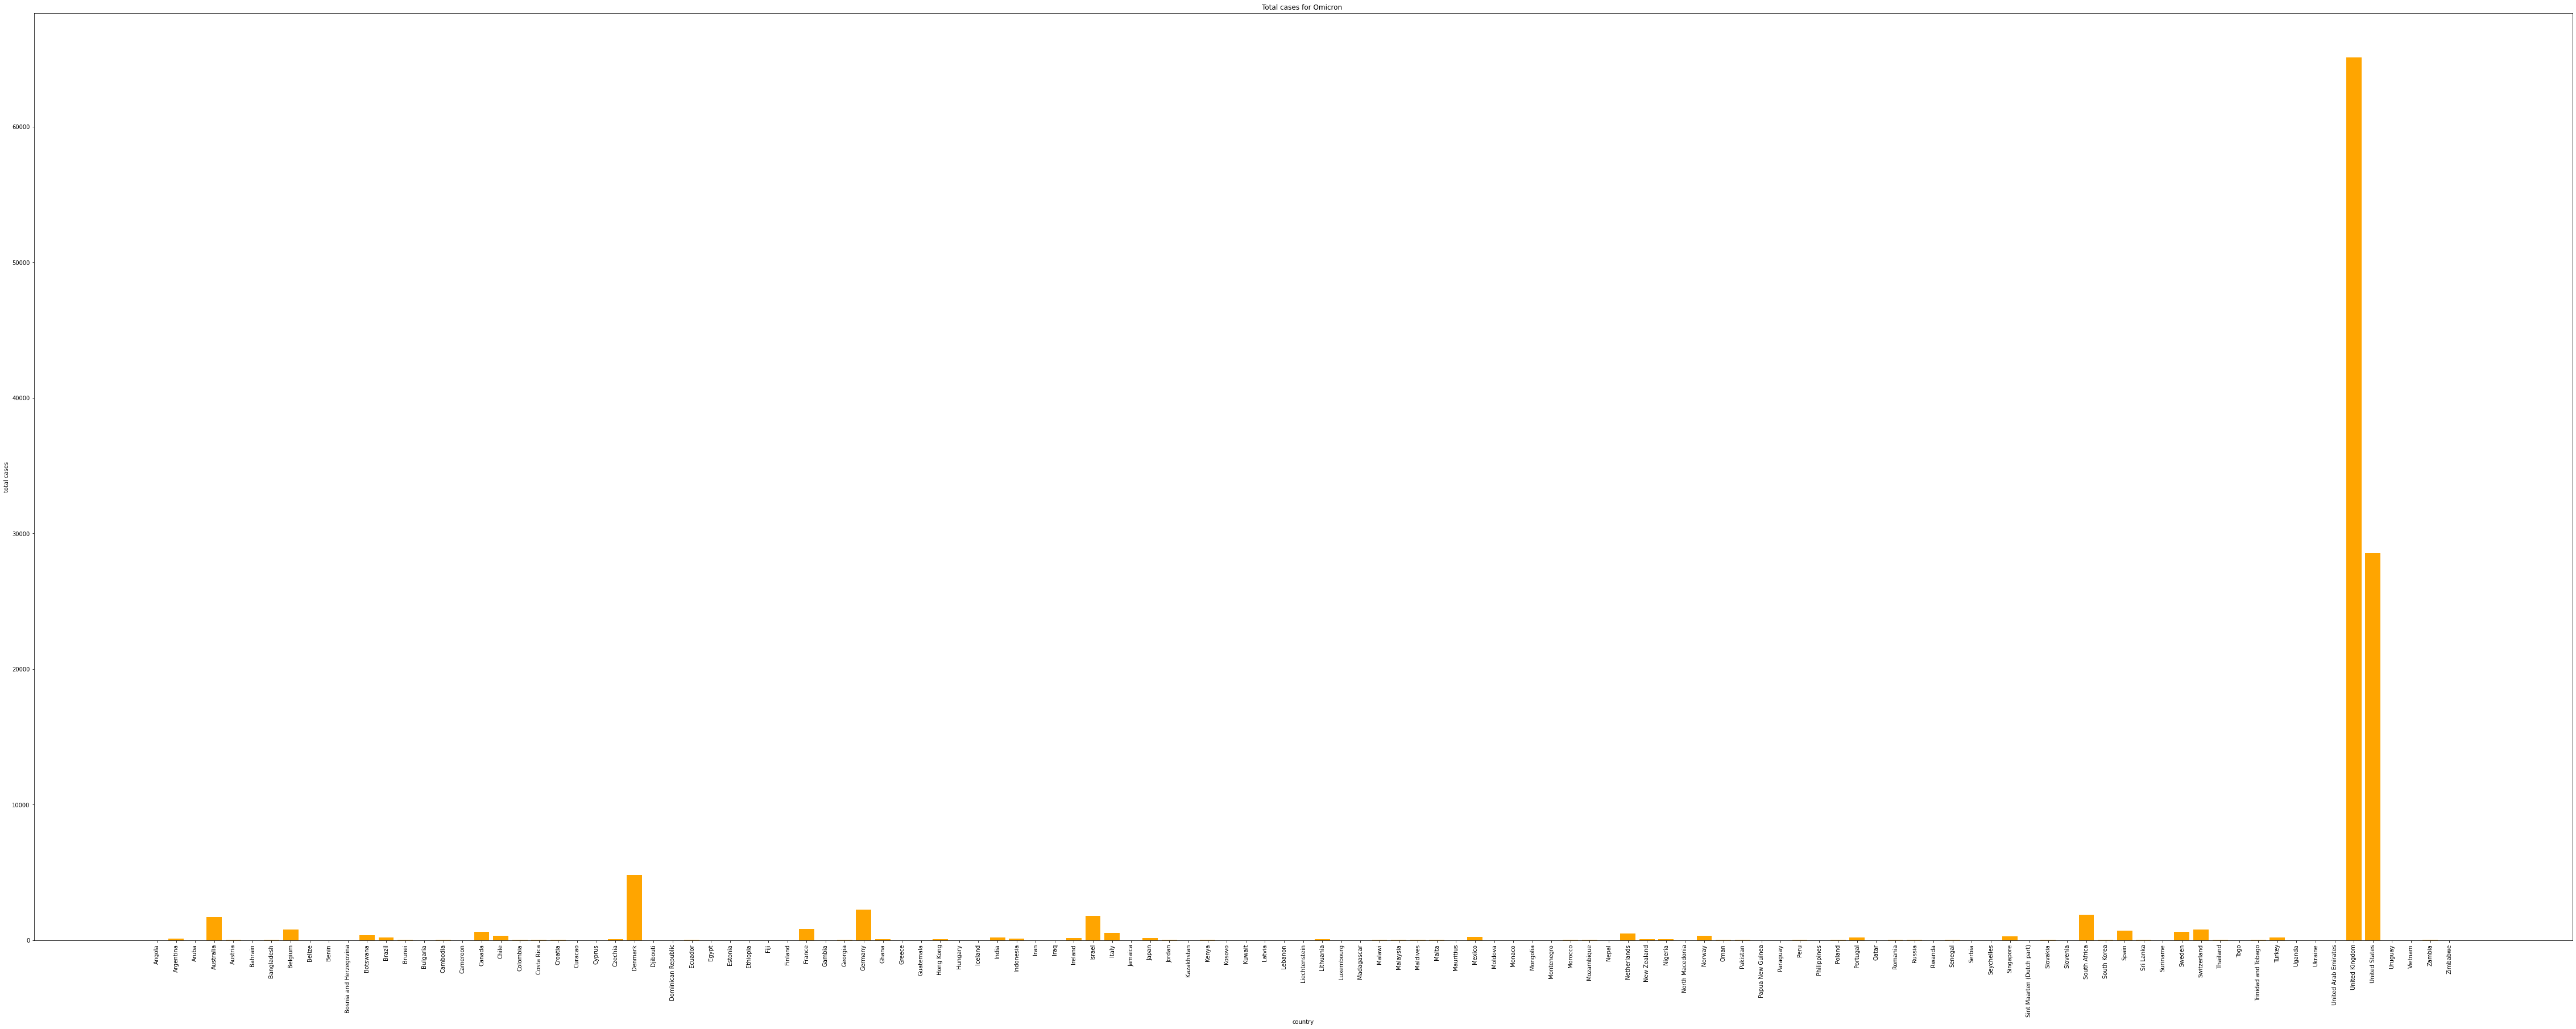

In [8]:
cases=[]
for i in total_city:
    total= omicron[omicron.location.values==i]
    case= total['num_sequences'].sum()
    cases.append(case)
fig= plt.figure(figsize=(80,30))
plt.bar(total_city,cases,color='orange')
plt.xticks(rotation=90)
plt.xlabel("country")
plt.ylabel("total cases")
plt.title("Total cases for Omicron ")
plt.show


# ****Date wise total number of cases in 4 dominant variants

In [9]:
da= df.groupby("date")
alphas=[]
betas=[]
deltas=[]
omicrons=[]

for i in dates:
    alpha = df[(df.date.values==i)&(df.variant.values=="Alpha")]
    total_alpha = alpha['num_sequences'].sum()
    alphas.append(total_alpha)
    delta =  df[(df.date.values==i)&(df.variant.values=="Delta")]
    total_delta = delta['num_sequences'].sum()
    deltas.append(total_delta)
    beta = df[(df.date.values==i)&(df.variant.values=="Beta")]
    total_beta = beta['num_sequences'].sum()
    betas.append(total_beta)
    omicron1= df[(df.date.values==i)&(df.variant.values=="Omicron")]
    total_omicron= omicron1['num_sequences'].sum()
    omicrons.append(total_omicron)

ca = pd.DataFrame({"Dates":dates,"Alpha":alphas,"Betas":betas,"Deltas":deltas,"Omicron":omicrons})
print(ca)







         Dates   Alpha  Betas  Deltas  Omicron
0   2020-07-06       0      0       0        0
1   2020-08-31       0     21       0        0
2   2020-09-28       3     71       0        0
3   2020-10-12      15     88       0        0
4   2020-10-26      47    148       3        0
5   2020-12-07    1128    446      20        0
6   2020-12-21    9061    650      13        0
7   2021-01-04   14002   1139      18        0
8   2021-01-11   12101    903      67        0
9   2021-01-25   33497   1601      58        0
10  2021-02-08   48817   1840      81        0
11  2021-02-22   63335   2395     133        0
12  2021-03-08   85363   3082     139        0
13  2021-03-22  122805   4606     936        0
14  2021-04-05  137566   4652    1280        0
15  2021-04-19  142801   3897    5105        0
16  2021-05-03  141711   3336    9712        0
17  2021-05-17  120332   2627   14518        0
18  2021-05-31   82479   1854   28481        0
19  2021-06-14   50137   1586   51537        0
20  2021-06-2

# ****Bar Graph

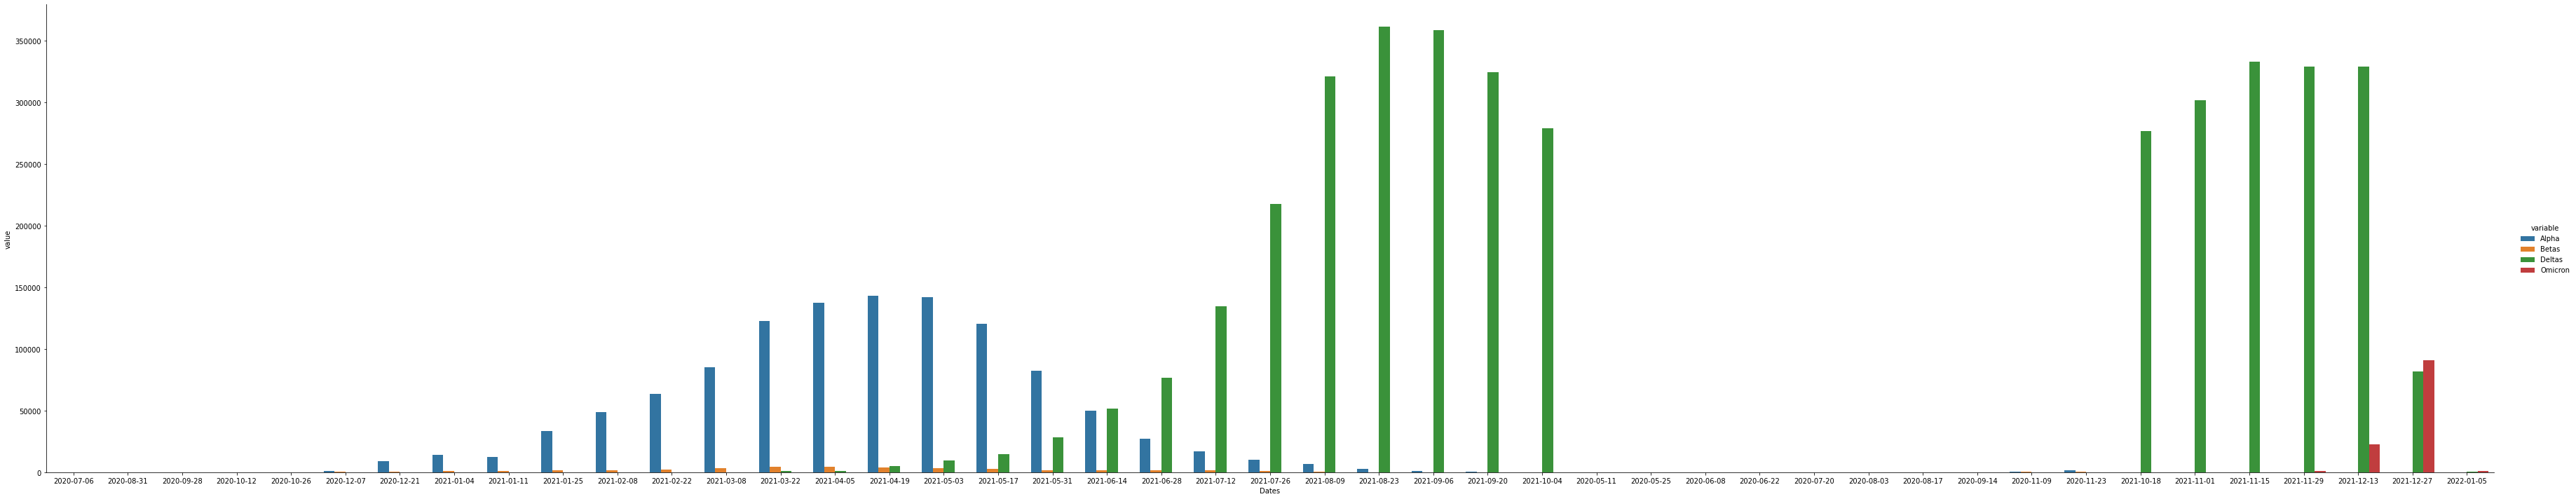

In [10]:
df1=pd.melt(ca,id_vars=["Dates"])
df1
fig=sns.catplot(x='Dates',y='value',hue='variable',data=df1,kind='bar',height=10,aspect=5)


